<a href="https://colab.research.google.com/github/albertofernandezvillan/computer-vision-and-deep-learning-course/blob/main/take_image_from_webcam_as_numpy_array.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" style="padding-right:10px;" src ="https://raw.githubusercontent.com/albertofernandezvillan/computer-vision-and-deep-learning-course/main/assets/university_oviedo_logo.png" width=300 px>

This notebook is from the Course "***Computer vision in the new era of Artificial Intelligence and Deep Learning***", or "*Visión por computador en la nueva era de la Inteligencia Artificial y el Deep Learning*" (ES) from the "Second quarter university extension courses" that the University of Oviedo is offering (05/04/2021 - 16/04/2021)

<[Github Repository](https://github.com/albertofernandezvillan/computer-vision-and-deep-learning-course) | [Course Web Page Information](https://www.uniovi.es/estudios/extension/cursos2c/-/asset_publisher/SEp0PJi4ISGo/content/vision-por-computador-en-la-nueva-era-de-la-inteligencia-artificial-y-el-deep-learning?redirect=%2Festudios%2Fextension%2Fcursos2c)>

# Summary

OpenCV provides a very simple interface to capture live stream with camera. To capture a video, you need to create a `VideoCapture` object. Its argument can be either the device index or the name of a video file. Device index is just the number to specify which camera. Normally one camera will be connected, so we can simply pass 0 (or -1). See the sample code next.
```
cap = cv2.VideoCapture(0)

while(True):
    # Capture frame-by-frame (frame is a OpenCV image)
    ret, frame = cap.read()

    # .....
    # ..... 

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()
```
However, `cv2.VideoCapture()` does not work in Colab, because the previous method can only access hardware (e.g. webcam) connected locally. Therefore, accessing the webcam in Colab is not straightforward because the Notebook is executed remotelly. 
Therefore, in this Notebook we will see a method to capture a image (frame) from your webcam. 


# Take a photo with your webcam

We are going to see how you can take a photo (image or frame) with your webcam. 

It should be noted that in the [following URL](https://answers.opencv.org/question/231737/videocapture-in-colab/) you can see the question "*VideoCapture in Colab: How do i use cv2.VideoCapture(0) in google colab. I want to use the live video from my webcam in colab. Is there anyway to do it*". The answer provides the following [Colab link](https://colab.research.google.com/notebooks/snippets/advanced_outputs.ipynb#scrollTo=2viqYx97hPMi). In previous Colab file we can see a solution where the image taken from the webcam is saved to a file on disk. 

Therefore, we have modified it to return the image as a numpy array instead of writing the file on disk. There is scarse information about this on the Internet. Only a similar approach to this was found [here](https://ricardodeazambuja.com/deep_learning/2019/03/09/audio_and_video_google_colab/).

All in all, the function `take_photo()` can be used to get a numpy array from your webcam.




In [9]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
from PIL import Image
import numpy as np
import io

def take_photo(quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  f = io.BytesIO(binary)
  return np.asarray(Image.open(f))

Once coded, we can test it. As commented before, the function `take_photo()` can be used to capture image from webcam using only one click.

In [13]:
img = take_photo(quality=0.8) 


<IPython.core.display.Javascript object>

Check the dimensions of the acquired image `img`:

In [14]:
print(img.shape)

(480, 640, 3)


We show it using `cv2_imshow()`:

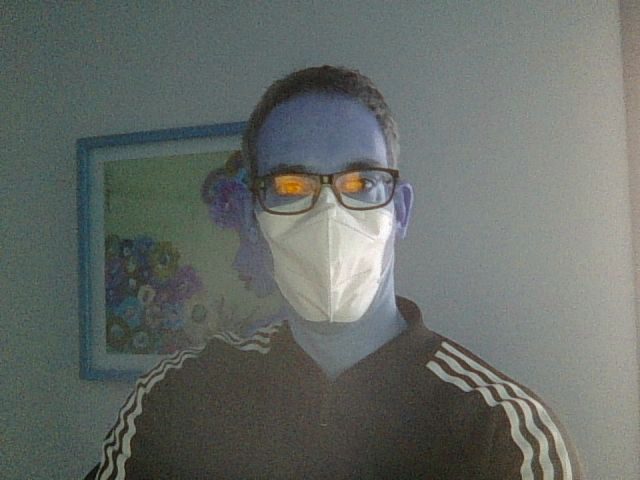

In [17]:
from google.colab.patches import cv2_imshow

cv2_imshow(img)

Wen can see that the image is not displayed correctly. This is because the returned image is in RGB format. Therefore, if we want to show it using `cv2_imshow()`, we should convert it to BGR format. See next how to do it:

In [18]:
img_bgr = img[:, :, ::-1]

Finally, we can show it again but this time in the correc format.

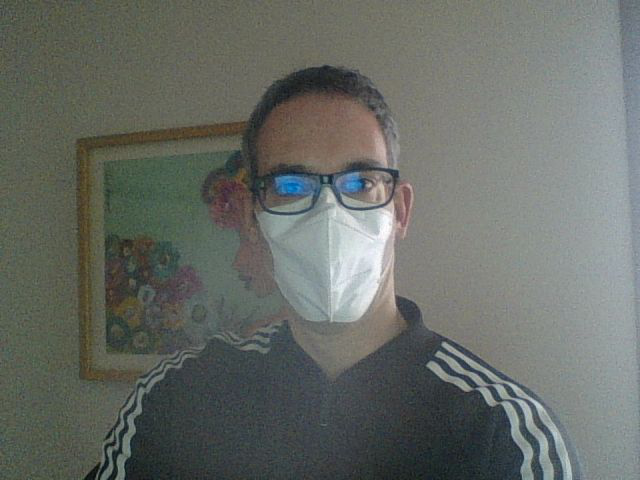

In [20]:
cv2_imshow(img_bgr)

# Conclusion

The takeaway from this is that it is that `cv2.VideoCapture()` does not work in Colab. If you want to take a photo with your webcam, you should the method `take_photo()` introduced before.